### Academic honesty statement



Place your academic honesty statement here. Here are some acceptable examples.

-   I worked alone on this assignment.
-   I worked with <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_\_</span></span></span></span> on this assignment.”
-   I received assistance from <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_</span></span></span></span> on this assignment.



### Binary batch distillation



In the binary, batch distillation of benzene (1) and toluene (2), the moles of liquid $L$ remaining as a function of the mole fraction of toluene ($x_2$) is expressed by:

$\frac{dL}{dx_2} = \frac{L}{x_2 (k_2 - 1)}$

where $k_2$ is the vapor liquid equilibrium ratio for toluene. This can be computed as:

$k_i = P_i / P$ where $P_i = 10^{A_i + \frac{B_i}{T +C_i}}$ and that pressure is in mmHg, and the temperature is in degrees Celsius.

As the batch distillation progresses, the temperature changes according to:

$\frac{dT}{dx_2} = \frac{-(k_2 - k_1)}{\ln(10)\left[x_1 k_1 \frac{-B_1}{(C_1 + T)^2} + x_2 k_2 \frac{-B_2}{(C_2 + T)^2}\right]}$

with the relationship that $1 = x_1 + x_2$.

Given the following information, determine how many moles of liquid are left in the distillation when $x_2 = 0.8$, and the temperature in the still at that point.

The total pressure is fixed at 1.2 atm, and the distillation starts at $x_2=0.4$, there are initially 100 moles of liquid present, and an initial temperature of 95.6 degrees Celsius.

| species|A|B|C|
|---|---|---|---|
| benzene|6.90565|-1211.033|220.79|
| toluene|6.95464|-1344.8|219.482|



Hint: The final temperature is about 108 degrees Celsius.



### solution



We have to setup a function that defines the two ODEs, and then solve it.  We then get the final moles and temperature from the last value of the solution. The only subtle points are that we have to convert one pressure from atm to mmHg, and we have to use the system pressure to compute the $k_i$.



In [1]:
import numpy as np
from scipy.integrate import solve_ivp

A1, B1, C1 = 6.90565, -1211.033, 220.79
A2, B2, C2 = 6.95464, -1344.8, 219.482

P = (760 * 1.2) # mmHg

def ode(x2, X):
    L, T = X

    P1 = 10**(A1 + B1 / (T + C1))
    P2 = 10**(A2 + B2 / (T + C2))

    k1 = P1 / P
    k2 = P2 / P
    x1 = 1 - x2

    dLdx2  = L / (x2 * (k2 - 1))
    dTdx2 = -(k2 - k1) / (np.log(10) * (x1 * k1 * (-B1 / (C1 + T)**2)+ x2 * k2 * (-B2 / (C2 + T)**2)))
    return dLdx2, dTdx2



X0 = (100, 95.6)
x2_span = (0.4, 0.8)
sol = solve_ivp(ode,  x2_span, X0)
sol

L, T = sol.y

print(f'The final number of moles left is {L[-1]:1.2f} moles and the temperature is {T[-1]:1.2f} degC.')

# Out [3]:
# output
The final number of moles left is 14.04 moles and the temperature is 108.59 degC.

It is a mistake to use $P = P1 + P2$. Why? Those are the vapor pressures of the pure components, and in the still the components are not pure. You could assume they are ideal, and use the mole fraction weighted sum of these though. That is the same as assuming the pressure is constant; temperature adjusts to keep the bubble point pressure at the system pressure. The dashed line shows that the weighted sum and the constant pressure are the same.



# Out [9]:
# text/plain
Text(0, 0.5, 'Pressure (mmHg)')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

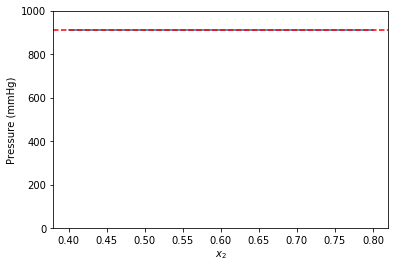

In [1]:
P1 = 10**(A1 + B1 / (T + C1))
P2 = 10**(A2 + B2 / (T + C2))
x2 = sol.t
x1 = 1 - x2

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x2, x1 * P1 + x2 * P2)
plt.ylim([0, 1000])
plt.axhline(P, c='r', ls='--')
plt.xlabel('$x_2$')
plt.ylabel('Pressure (mmHg)')